In [1]:
from collections import Counter
import pandas as pd

class ZeroR():
    def __init__(self):
        self.label = None
    
    def fit(self, X, y):
        c = Counter(y)
        most_label = c.most_common(1)[0][0]
        self.label = most_label
    
    def predict(self, X):
        return [self.label] * X.shape[0]

    
class OneR():
    def __init__(self):
        self.right_index = -1
        self.all_rules = {}
        self.all_right_ratio = {}
    
    def fit(self, x_train, y_train):
        column_indexs = x_train.shape[1]
        max_ratio = 0
        self.right_index = -1
        self.all_rules = {}
        self.all_right_ratio = {}
        total_cnt = len(y_train)
        for col_index in range(column_indexs):
            df = pd.DataFrame()
            df['f'] = x_train[:, col_index]
            df['label'] = y_train
            df['count'] = 1
            group = df.groupby(['f', 'label']).sum()
            #print group
            f_values = list(group.index.levels[0])
            #print f_values
            # rule
            rule_dict = {}
            for f_value in f_values:
                rule_dict[f_value] = 'nan'
                max_count = -1
                for label in group.loc[f_value].index:
                    if group.loc[f_value].loc[label]['count'] > max_count:
                        rule_dict[f_value] = label
                        max_count = group.loc[f_value].loc[label]['count']
            self.all_rules[col_index] = rule_dict
            # right_ratio
            #print rule_dict
            y_test = [rule_dict.get(value) for value in df['f']]
            right_cnt = 1
            for i in range(total_cnt):
                if y_test[i] == y_train[i]:
                    right_cnt += 1
            right_ratio = 1.0 * right_cnt / total_cnt
            self.all_right_ratio[col_index] = right_ratio
            if right_ratio > max_ratio:
                max_ratio = right_ratio
                self.right_index = col_index

    def predict(self, X):
        y_predict = [self.all_rules[self.right_index].get(value) for value in X[:, self.right_index]]
        return y_predict

In [1]:
import sys
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
# the training data folder must be passed as first argument
df = pd.read_csv('test.csv',names = ['type','texts'])
# split the dataset in training and test set:
docs_train, docs_test, target_train, target_test = train_test_split(
    df['texts'], df['type'], test_size=0.25, random_state=0)
d = {'type':[1,2,3,4], 'texts':[" UNITED NATIONS (Reuters) - The U.N. Security Council met in  emergency session concerning Burundi on Sunday following the  massacre of more than 150 Tutsi Congolese refugees at a camp in  western Burundi.",
                                "AP - Adrian Beltre and Shawn Green homered, and Steve Finley hit a go-ahead RBI single in the eighth inning as the Los Angeles Dodgers rallied for an 8-5 victory over the Chicago Cubs on Sunday.",
                                "AP - New England's bitterly cold winters may be hard on people, but they have been even harder on an Asian insect that's threatening to destroy hemlocks, one of the signature trees of the region's forests.",
    "TEHRAN (Reuters) - OPEC can do nothing to douse scorching oil prices when markets are already oversupplied by 2.8 million barrels per day (bpd) of crude, Iran s OPEC governor said  Saturday, warning that prices could fall sharply."]}
sam = pd.DataFrame(data = d)
#grid_search.predict(sam)

In [2]:
docs_train, docs_test, target_train, target_test = train_test_split(
    df['texts'], df['type'], test_size=0.25, random_state=0)
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf = TfidfVectorizer(min_df=0.01, max_df=0.80, ngram_range = (1,2),analyzer ='word')
Tfidf.fit(docs_train)
Xtrain = Tfidf.transform(docs_train)
Xtest = Tfidf.transform(docs_test)
print(Tfidf.get_feature_names())
#print(len(Tfidf.get_feature_names()))

['000', '10', '11', '12', '20', '2004', '39', 'about', 'according', 'according to', 'afp', 'after', 'after the', 'against', 'against the', 'agency', 'ago', 'agreed', 'agreement', 'ahead', 'air', 'al', 'all', 'already', 'america', 'american', 'an', 'and', 'and other', 'and the', 'announced', 'another', 'any', 'ap', 'are', 'around', 'as', 'as the', 'aspx', 'aspx ticker', 'at', 'at least', 'at the', 'athens', 'australia', 'back', 'baghdad', 'bank', 'based', 'be', 'beat', 'because', 'been', 'before', 'being', 'between', 'bid', 'big', 'biggest', 'billion', 'boston', 'both', 'british', 'bush', 'business', 'but', 'buy', 'by', 'by the', 'called', 'can', 'championship', 'chicago', 'chief', 'china', 'city', 'co', 'coach', 'com', 'com fullquote', 'commission', 'companies', 'company', 'computer', 'contract', 'corp', 'could', 'country', 'court', 'cup', 'cut', 'data', 'day', 'days', 'deal', 'digital', 'dollar', 'down', 'due', 'during', 'early', 'earnings', 'economic', 'election', 'end', 'england', '

In [32]:
from sklearn import tree

clf =tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=None,
                                min_samples_split=0.01)
clf.fit(Xtrain, target_train)

target_predicted = clf.predict(Xtest)
print(target_predicted)

# Print the classification report
print(metrics.classification_report(target_test, target_predicted))

#Print and plot the confusion matrix
cm = metrics.confusion_matrix(target_test, target_predicted)
print(clf.score(Xtest, target_test))
print(cm)

[3 2 4 ..., 4 1 4]
             precision    recall  f1-score   support

          1       0.62      0.66      0.64       476
          2       0.71      0.74      0.72       478
          3       0.52      0.54      0.53       450
          4       0.61      0.51      0.56       496

avg / total       0.61      0.61      0.61      1900

0.614736842105
[[316  60  66  34]
 [ 64 355  36  23]
 [ 57  42 243 108]
 [ 74  46 122 254]]


In [131]:
a = Tfidf.transform(sam['texts'])
clf.predict(a)

array([2, 1, 2, 3])

             precision    recall  f1-score   support

          1       0.86      0.84      0.85       476
          2       0.84      0.96      0.90       478
          3       0.78      0.77      0.77       450
          4       0.82      0.73      0.77       496

avg / total       0.82      0.83      0.82      1900

[[399  33  31  13]
 [  5 461   2  10]
 [ 21  27 345  57]
 [ 38  30  65 363]]
0.833343017762


<IPython.core.display.Javascript object>


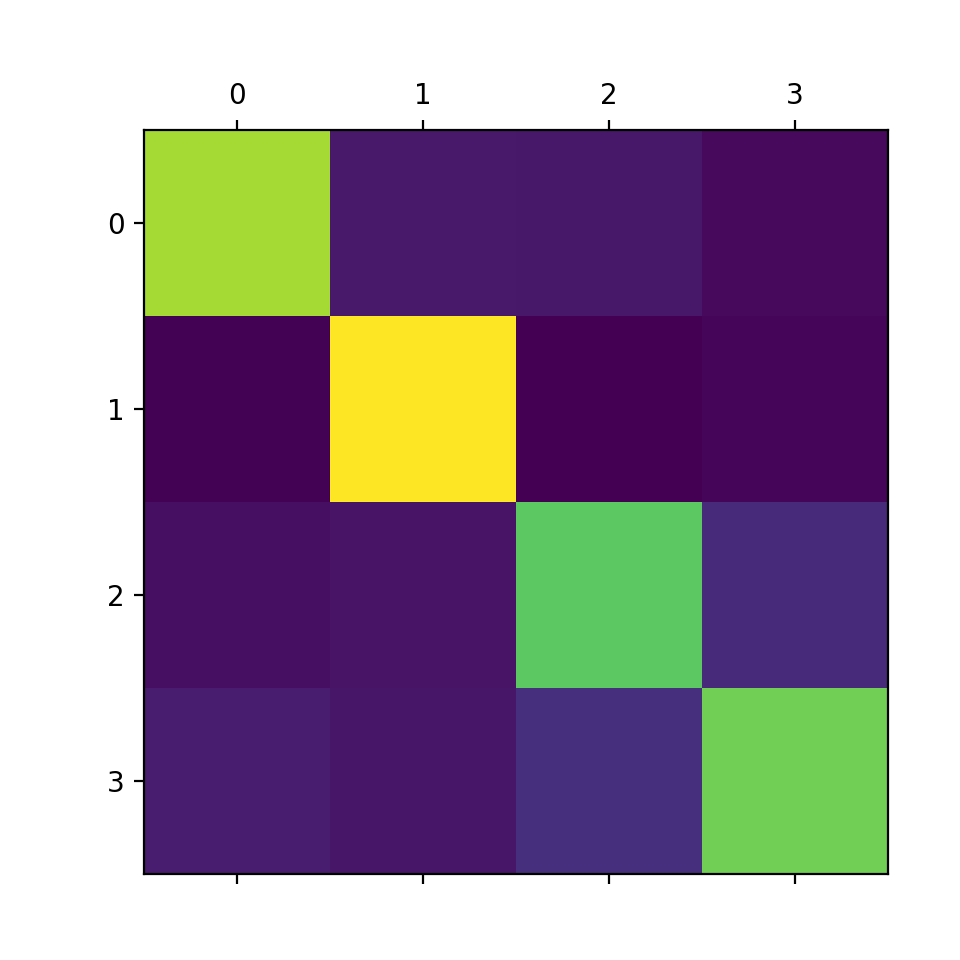

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score  
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(Xtrain, target_train)

target_predicted = knn.predict(Xtest)

# Print the classification report
print(metrics.classification_report(target_test, target_predicted))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(target_test, target_predicted)
print(cm)
print(precision_score(target_predicted, target_test, average = 'weighted'))
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()

In [152]:
a = Tfidf.transform(sam['texts'])
knn.predict(a)

array([1, 2, 1, 3])

In [56]:
from sklearn.neighbors import KNeighborsClassifier
s = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtrain, target_train)

    target_predicted = knn.predict(Xtest)

    # Print the classification report
    #print(metrics.classification_report(target_test, target_predicted))

    # Print and plot the confusion matrix
    #cm = metrics.confusion_matrix(target_test, target_predicted)
    #print(cm)
    s.append(precision_score(target_predicted, target_test, average = 'weighted'))

In [54]:
m = [[1, 0.7706230266941082],
 [2, 0.7792676003243999],
 [3, 0.80365158806386261],
 [4, 0.81155294145372192],
 [5, 0.81770859458449507],
 [6, 0.81773642370915012],
 [7, 0.8187322279044813],
 [8, 0.82488658659181058],
 [9, 0.83505524070451786],
 [10, 0.8263675927431019],
 [11, 0.8324601502308473],
 [12, 0.83188425390686083],
 [13, 0.83084263589962382],
 [14, 0.82501069166568819],
 [15, 0.82766297477621265],
 [16, 0.82629160513478306],
 [17, 0.8283685910431734],
 [18, 0.83522124689786126],
 [19, 0.83166188406953812],
 [20, 0.83121580543619644],
 [21, 0.83247032164323054],
 [22, 0.82902228311006021],
 [23, 0.82857851185369757],
 [24, 0.83049974926067582],
 [25, 0.83130512184744276],
 [26, 0.83194927115968609],
 [27, 0.83019291238186532],
 [28, 0.83080868382161177],
 [29, 0.83295130267890238],
 [30, 0.83383395718560482],
 [31, 0.83149398533218499],
 [32, 0.83354331192323061],
 [33, 0.83409909087851064],
 [34, 0.83465661389745027],
 [35, 0.8346085831014487],
 [36, 0.83638890242810537],
 [37, 0.83514792497355217],
 [38, 0.83640674580805474],
 [39, 0.8388834084901623],
 [40, 0.83452826425036442],
 [41, 0.83841158149565975],
 [42, 0.83542755782031408],
 [43, 0.83701826107331645],
 [44, 0.8347852691282166],
 [45, 0.83541680746025715],
 [46, 0.83384781084716053],
 [47, 0.83655125068831127],
 [48, 0.83821422787720712],
 [49, 0.83525130986123697],
 [50, 0.83659707500790914],
 [51, 0.83583186506873597],
 [52, 0.83296231792970787],
 [53, 0.83427874542383607],
 [54, 0.83331599136902057],
 [55, 0.83401928791833413],
 [56, 0.83391673837559688],
 [57, 0.83485455940600584],
 [58, 0.83590848925751648],
 [59, 0.83700522183683623],
 [60, 0.83682199025788628],
 [61, 0.83798400423740826],
 [62, 0.83667002870267448],
 [63, 0.83662652966266393],
 [64, 0.8371968578012362],
 [65, 0.83914083522595495],
 [66, 0.83988332720793646],
 [67, 0.83981679524677311],
 [68, 0.84084584339753954],
 [69, 0.84235661407852591],
 [70, 0.8386545535376303],
 [71, 0.84201176884077411],
 [72, 0.83951324965795782],
 [73, 0.84118524558241647],
 [74, 0.83918017324439775],
 [75, 0.84117895286834421],
 [76, 0.83993933414538113],
 [77, 0.83786337353988138],
 [78, 0.83671723955013089],
 [79, 0.83654038608728098],
 [80, 0.83520156762503495],
 [81, 0.83188444789655491],
 [82, 0.83134121647835102],
 [83, 0.82949186441666489],
 [84, 0.82989739281419372],
 [85, 0.82998713610822905],
 [86, 0.83154013512443126],
 [87, 0.83157908326169405],
 [88, 0.83138856024526164],
 [89, 0.83025308842875656],
 [90, 0.83406662059220749],
 [91, 0.83378319666236367],
 [92, 0.83297697484453714],
 [93, 0.83217367086415872],
 [94, 0.83126172124076925],
 [95, 0.83037150510075097],
 [96, 0.83425040400789729],
 [97, 0.83005662400219948],
 [98, 0.83086878571571499],
 [99, 0.83387577365354504],
 [100, 0.833343017762404],
 [150, 0.8323291259985249],
 [200, 0.8286351108880232],
 [250, 0.8243272550535867],
 [300, 0.8256500495868621],
 [350, 0.8256190165466702],
 [400, 0.8227665329167851],
 [450, 0.8188919729769709],
 [500, 0.8122915540567005],
 [550, 0.8127848005124718],
 [600, 0.8105447591256821],
 [650, 0.8132750434914786],
 [700, 0.8111668907762672],
 [750, 0.8092681906259459],
 [800, 0.8079576260605851],
 [850, 0.80406984039315],
 [900, 0.8043545438341657],
 [950, 0.799319436621049]]

In [104]:
Tfidf = TfidfVectorizer(min_df=0.001, max_df=0.80, ngram_range = (1,2),analyzer ='word')
Tfidf.fit(docs_train)
Xtrain = Tfidf.transform(docs_train)
Xtest = Tfidf.transform(docs_test)

[[50, 0.61578947368421055],
 [100, 0.61578947368421055],
 [150, 0.61578947368421055],
 [200, 0.61578947368421055],
 [250, 0.61578947368421055],
 [300, 0.61578947368421055],
 [350, 0.61578947368421055],
 [400, 0.61578947368421055],
 [450, 0.61578947368421055],
 [500, 0.61578947368421055],
 [550, 0.61578947368421055],
 [600, 0.61578947368421055],
 [650, 0.61578947368421055],
 [700, 0.61578947368421055],
 [750, 0.61578947368421055],
 [800, 0.61578947368421055],
 [850, 0.61578947368421055],
 [900, 0.61578947368421055],
 [950, 0.61578947368421055]]

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold

Xtrain = Xtrain.toarray()

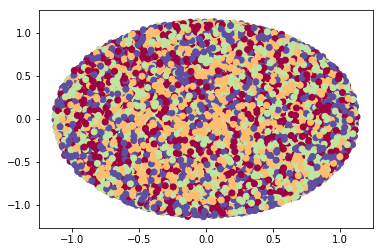

In [9]:
mds = manifold.MDS(n_components = 2, max_iter=1000, n_init=2)
Y = mds.fit_transform(Xtrain)
#ax = plt.figure().add_subplot(111, projection = '3d')
ax = plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c= target_train, cmap=plt.cm.Spectral)
#ax.gca().xaxis.set_major_formatter(NullFormatter())
#ax.gca().yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

<IPython.core.display.Javascript object>


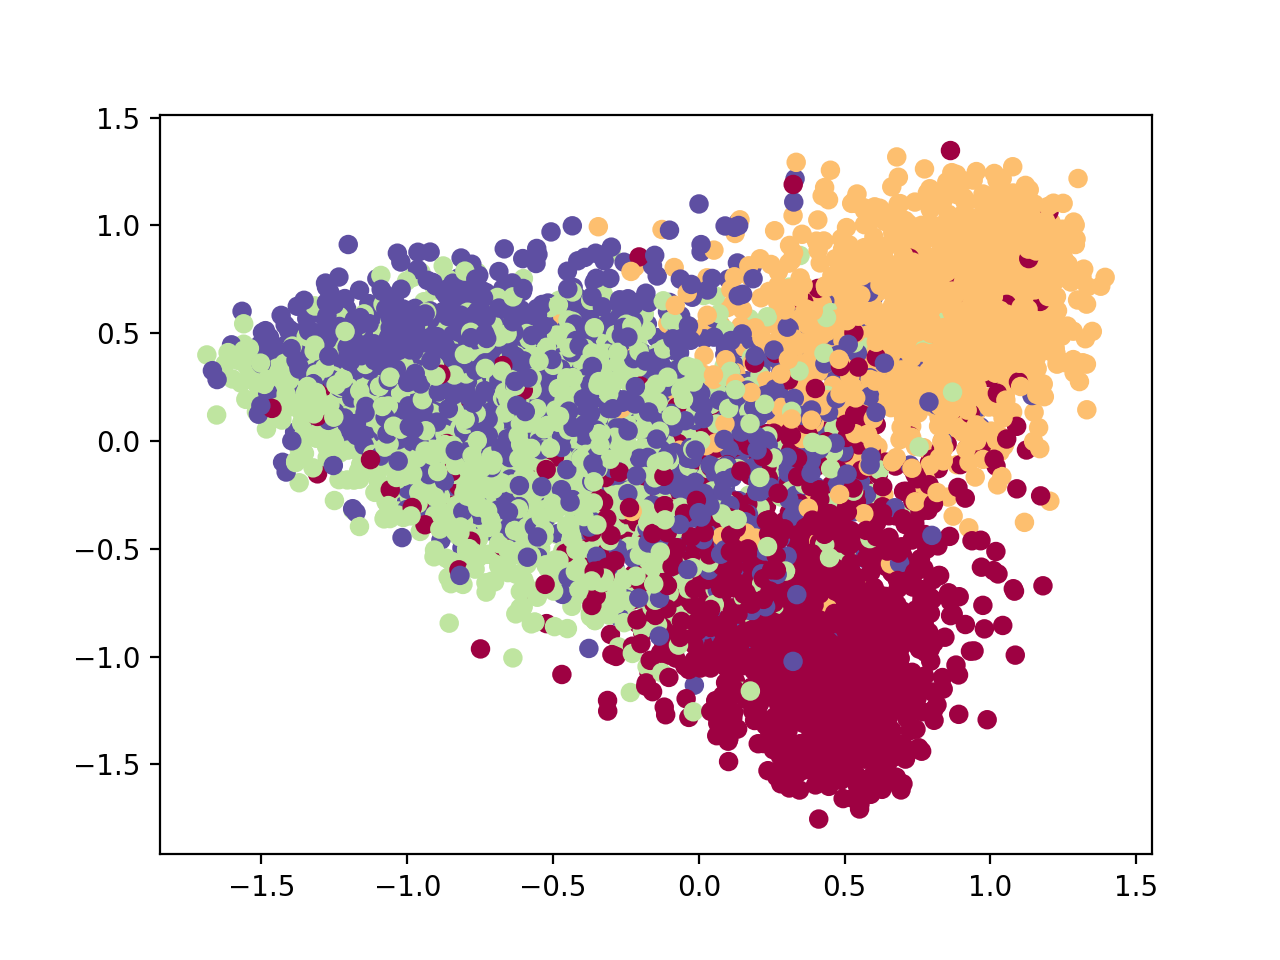

In [63]:
iso = manifold.Isomap(n_components = 2, n_neighbors = 62, eigen_solver = 'dense')
Y = iso.fit_transform(Xtrain)
#Y = mds.fit(Xtrain)
#ax = plt.figure().add_subplot(111,projection = '3d')
ax = plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c= target_train, cmap=plt.cm.Spectral)
#ax.gca().xaxis.set_major_formatter(NullFormatter())
#ax.gca().yaxis.set_major_formatter(NullFormatter())
#plt.axis('tight')

plt.show()

<IPython.core.display.Javascript object>


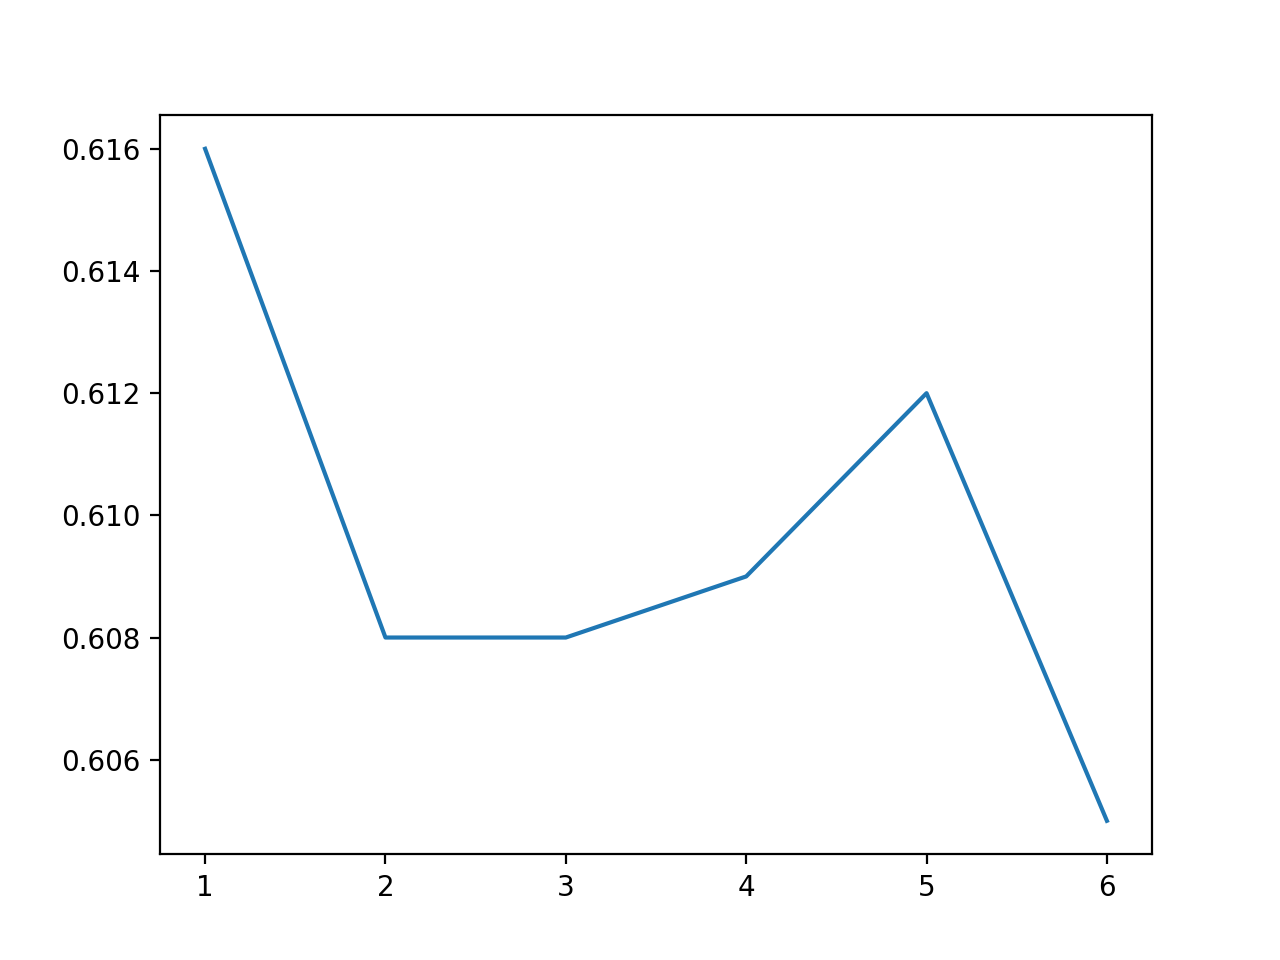

In [26]:
%matplotlib notebook
L = [(1,1),(1,2),(1,3),(1,4),(1,5),(1,6)]
S = [0.616, 0.608, 0.608, 0.609, 0.612, 0.605]
plt.figure()
plt.plot([1,2,3,4,5,6],S,'-')

<IPython.core.display.Javascript object>


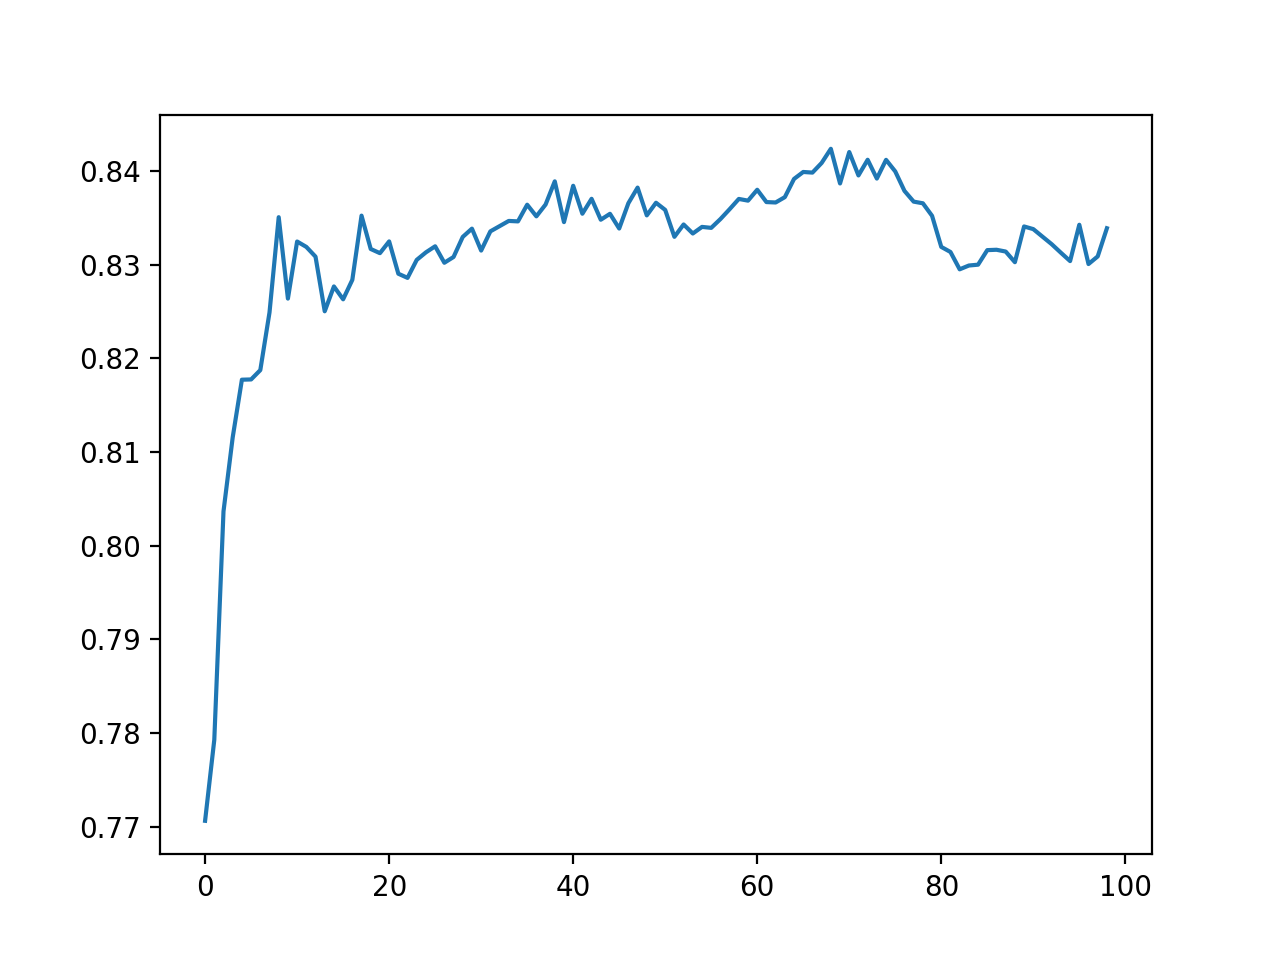

In [57]:
plt.figure()
plt.plot(s,'-')